# Lab 3
Exploratory Data Analysis

### Learning objectives 
Upon successful completion of this lab, you will have demonstrated the abilities to: 
1. Describing numeric and categorical distributions
2. Estimating correlation and association
3. Working with different data types and doing type conversions
4. Working with Strings and String Processing
5. Testing mean differences in groups
6. Visualizing distributions, relationships, and groups




In [69]:
import pandas as pd
customer = pd.read_csv('customer_demographics.csv')
customer.dtypes

Education       object
customer_id      int64
AGE            float64
marital         object
JOB             object
dtype: object

1. Print the first five records from the customer dataframe to get an idea about the data.

In [70]:
customer.head() # .head(5)

,Education,customer_id,AGE,marital,JOB
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


2.Change customer_id type to category. Then print the types of all columns.

In [71]:
customer['customer_id'] = customer['customer_id'].astype('category')
customer.dtypes

Education        object
customer_id    category
AGE             float64
marital          object
JOB              object
dtype: object

In [72]:
customer.columns

Index(['Education', 'customer_id', 'AGE', 'marital', 'JOB'], dtype='object')

3. Convert all the column names to lowercase.

In [73]:
customer.columns = customer.columns.str.lower()
customer.dtypes

education        object
customer_id    category
age             float64
marital          object
job              object
dtype: object

4. Change the customer_id of the first two records to 1001036.

In [74]:
if "1001036" not in customer['customer_id'].cat.categories: # Checking if the Category exists
    customer['customer_id'] = customer['customer_id'].cat.add_categories("1001036") # Adding the Category if it does not exist
customer.loc[0:1, 'customer_id'] = "1001036"
customer.head(2)

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management


5.Check if the first customer id matches the pattern. 
- Define a pattern that checks for exactly 6 digits in a string
- Compile the 6-digits pattern in a variable p. 
- Call the p.match() by passing the first customer id as argument. Use customer.iloc[0,1] which is the customer in the first row of the the dataframe. 
- print the return value.

In [75]:
import re
p = re.compile(pattern=r'^\d{6}$') # Regular expression pattern which matches a 6 digit number
match = p.match(customer.iloc[0, 1]) # Match the pattern with the first element of the column
print(match)

None


6.Check if all customer id values match the pattern. 
- Compile the 6-digits pattern in a variable p. 
- Use map() function and pass p.match as predicate function/first argument and the customer_id column as second argument. 
- Wrap the return value in a list named customer_id_m. 
- write a for loop, that will iterate through the matches list (customer_id_m), and print a message if there is no match. 

Expected output: 

customer id 1001036 in row 1 : does not match the pattern

customer id 1001036 in row 2 : does not match the pattern

In [76]:
customer_id_m = list(map(p.match, customer['customer_id'].astype(str)))

for i, match in enumerate(customer_id_m):
    if not match:
        print(f"customer id {customer.iloc[i, 1]} in row {i + 1} : does not match the pattern")
    # else:
    #     print(f"customer id {customer.iloc[i, 1]} in row {i + 1} : matches the pattern")

customer id 1001036 in row 1 : does not match the pattern
customer id 1001036 in row 2 : does not match the pattern


7.Check and treat errors in the education column.
- Display the list of unique values for  education
- lowercase all values under the education column. use mydf[colname].str.lower(). Keep the original column 'education' and add a new column named 'education_lowercase'. 
- after lowercasing, display the list of unique values for  education_lowercase column.

In [77]:
list(customer['education'].unique())

['secondary', 'tertiary', 'primary', 'unknown', 'SECONDARY']

In [78]:
customer['education_lowercase'] = customer['education'].str.lower()
list(customer['education_lowercase'].unique())

['secondary', 'tertiary', 'primary', 'unknown']

9.Copy values between columns and Drop columns 
- Assign the education_lower values to education. 
- drop the education_lowercase column 
- show the top rows of the dataset.

In [79]:
customer['education'] = customer['education_lowercase']
if 'education_lowercase' in customer.columns:
    customer.drop(columns=['education_lowercase'], inplace=True)
customer.head()

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


9.Find and correct errors in the job column.  
- show the list of unique values under the job column. Use value_counts() method. 
- admin. and ADMINISTRATION should refer to the same category level. replace all ADMINISTRATION occurrences with 'admin.' Use the replace() method. syntax: mydataframe.columnname.replace(oldvalue, newvalue) 
- after you make the changes, show again the list of unique values under the job column. 

ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace

In [80]:
customer['job'].value_counts()

job
management        2391
blue-collar       1914
technician        1768
admin.            1134
services           850
retired            757
student            375
self-employed      367
unemployed         353
entrepreneur       291
housemaid          262
unknown             65
ADMINISTRATION      51
Name: count, dtype: int64

In [81]:
customer['job'].replace('ADMINISTRATION', 'admin.', inplace=True)
customer['job'].value_counts()

C:\Users\JonathanChackoPattas\AppData\Local\Temp\ipykernel_38952\2931253221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer['job'].replace('ADMINISTRATION', 'admin.', inplace=True)


job
management       2391
blue-collar      1914
technician       1768
admin.           1185
services          850
retired           757
student           375
self-employed     367
unemployed        353
entrepreneur      291
housemaid         262
unknown            65
Name: count, dtype: int64

10. Add a new column to the dataframe by taking the first 3 letters of the marital column. 
- Note: you should lowercase all values for the marital column. 


In [82]:
customer['mariage_status'] = customer['marital'].str.lower().str[:3]
customer.value_counts('mariage_status') # customer['mariage_status'].value_counts()

mariage_status
mar    5942
sin    3393
div    1243
Name: count, dtype: int64

11.Add a dummy variable
- Add a new column marital_b to the dataframe that takes the value 0 if marital is single, 1 if marital is married and 2 if marital is divorced. 
- Hint: use the replace method on the required column and pass a dictionary of oldValue:newValue items for replacement.  


In [83]:
customer['marital_b'] = customer['mariage_status'].replace({'sin': 0, 'mar': 1, 'div': 2}) # customer['marital'].replace({'single': 0, 'married': 1, 'divorced': 2})
customer.value_counts('marital_b') # customer['marital_b'].value_counts()

C:\Users\JonathanChackoPattas\AppData\Local\Temp\ipykernel_38952\3374956814.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer['marital_b'] = customer['mariage_status'].replace({'sin': 0, 'mar': 1, 'div': 2}) # customer['marital'].replace({'single': 0, 'married': 1, 'divorced': 2})


marital_b
1    5942
0    3393
2    1243
Name: count, dtype: int64

12.Customized binning 
- add a new column age_group based on age. 
- If age is <35, age_group is set to young.
- if age between 36 and 55, the age_group is set to 'middle'.
- if age is >55, age_group is set to 'senior'.

    Use conditional assignment: https://datatofish.com/if-condition-in-pandas-dataframe/

This is the general structure that you may use to create the IF condition:

    df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

In [84]:
# import numpy as np
customer.loc[customer['age'] < 35, 'age_group'] = 'young'
customer.loc[(customer['age'] >= 35) & (customer['age'] <= 55), 'age_group'] = 'middle'
customer.loc[customer['age'] > 55, 'age_group'] = 'senior'
# customer['age_group'] = np.select([
#     (customer['age'] < 35),
#     (customer['age'] >= 35) & (customer['age'] <= 55),
#     (customer['age'] > 55)
# ], ['young', 'middle', 'senior'], default='unknown')
customer.value_counts('age_group')

age_group
middle    5406
young     3714
senior    1438
Name: count, dtype: int64

13.Download the Boston Housing dataset from https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
Read the csv file into a dataframe called boston.
Print the first 5 records from the boston dataframe.

In [85]:
import kagglehub
path = kagglehub.dataset_download("arunjangir245/boston-housing-dataset") # Download latest version
boston = pd.read_csv(path+"/BostonHousing.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


14.Show the quantile table for the numerical columns of boston dataset using the quantile() function. 

In [86]:
quantiles = boston.quantile([0, 0.25, 0.5, 0.75, 1]) # 25th, 50th and 75th percentile in the data
quantiles

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00,0.006320,0.0,0.46,0.0,0.385,3.561,2.900,1.129600,1.0,187.0,12.60,0.3200,1.730,5.000
0.25,0.082045,0.0,5.19,0.0,0.449,5.884,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025
0.50,0.256510,0.0,9.69,0.0,0.538,6.208,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200
0.75,3.677083,12.5,18.10,0.0,0.624,6.625,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000
1.00,88.976200,100.0,27.74,1.0,0.871,8.780,100.000,12.126500,24.0,711.0,22.00,396.9000,37.970,50.000


15.Show the summary statistics of boston dataset using the describe() function

In [87]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


16.First run the following command
print(boston.shape) and copy the result

We will now do the equal-sized binning:

        create a new dataframe boston_binned, result of equal-sized binning of all the numerical columns in boston dataset given the percentile points in the quantile table. 
        Use a for loop to iterate over the columns in boston dataset, and call qcut for binning each of the columns. 

        Refer to: ch13: exploring data analysis, page 4(Python for Data Science for Dummies, 2nd Edition), section: counting for categorical Data.

        print the first 5 rows of boston_binned dataset using the head() function.

In [88]:
boston.shape

(506, 14)

In [89]:
boston_binned = boston.copy() # Copying the DF to Manupulate an Isolated Copy without affecting the Original Table
for col in boston.columns: # for col in boston.select_dtypes(include=['float64', 'int64']).columns:
    if boston[col].dtype != 'float64' and boston[col].dtype != 'int64':
        continue
    boston_binned[col] = pd.qcut(boston[col], q=4, duplicates='drop') # , labels=False
boston_binned.head() # .head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,"(0.00532, 0.082]","(12.5, 100.0]","(0.459, 5.19]","(-0.001, 1.0]","(0.449, 0.538]","(6.208, 6.625]","(45.025, 77.5]","(3.207, 5.188]","(0.999, 4.0]","(279.0, 330.0]","(12.599, 17.4]","(396.225, 396.9]","(1.729, 6.95]","(21.2, 25.0]"
1,"(0.00532, 0.082]","(-0.001, 12.5]","(5.19, 9.69]","(-0.001, 1.0]","(0.449, 0.538]","(6.208, 6.625]","(77.5, 94.075]","(3.207, 5.188]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(396.225, 396.9]","(6.95, 11.36]","(21.2, 25.0]"
2,"(0.00532, 0.082]","(-0.001, 12.5]","(5.19, 9.69]","(-0.001, 1.0]","(0.449, 0.538]","(6.625, 8.78]","(45.025, 77.5]","(3.207, 5.188]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(391.44, 396.225]","(1.729, 6.95]","(25.0, 50.0]"
3,"(0.00532, 0.082]","(-0.001, 12.5]","(0.459, 5.19]","(-0.001, 1.0]","(0.449, 0.538]","(6.625, 8.78]","(45.025, 77.5]","(5.188, 12.126]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(391.44, 396.225]","(1.729, 6.95]","(25.0, 50.0]"
4,"(0.00532, 0.082]","(-0.001, 12.5]","(0.459, 5.19]","(-0.001, 1.0]","(0.449, 0.538]","(6.625, 8.78]","(45.025, 77.5]","(5.188, 12.126]","(0.999, 4.0]","(186.999, 279.0]","(17.4, 19.05]","(396.225, 396.9]","(1.729, 6.95]","(25.0, 50.0]"


17.Show the frequency table for the variable CRIM in boston_binned. Use value_counts() function. 

In [90]:
boston_binned['crim'].value_counts()

crim
(0.00532, 0.082]    127
(3.677, 88.976]     127
(0.082, 0.257]      126
(0.257, 3.677]      126
Name: count, dtype: int64

18.Study the relationship between CRIM and MEDV categorical variables in boston_binned dataframe. 

In [91]:
# Create a crosstab between each Series table which shows the frequency of each combination of values in the two Columns.
crossTabDf = pd.crosstab(boston_binned['crim'], boston_binned['medv']) # NOTE: Can Crossverify each value with `boston_binned.loc[(boston_binned['crim'] == 3) & (boston_binned['medv'] == 3)]`
pd.DataFrame(crossTabDf) # Making with pd.DataFrame to make it look better in Jupyter Printing.

medv,"(4.999, 17.025]","(17.025, 21.2]","(21.2, 25.0]","(25.0, 50.0]"
crim,,,,
"(0.00532, 0.082]",2,26,42,57
"(0.082, 0.257]",12,44,45,25
"(0.257, 3.677]",29,37,27,33
"(3.677, 88.976]",84,22,12,9


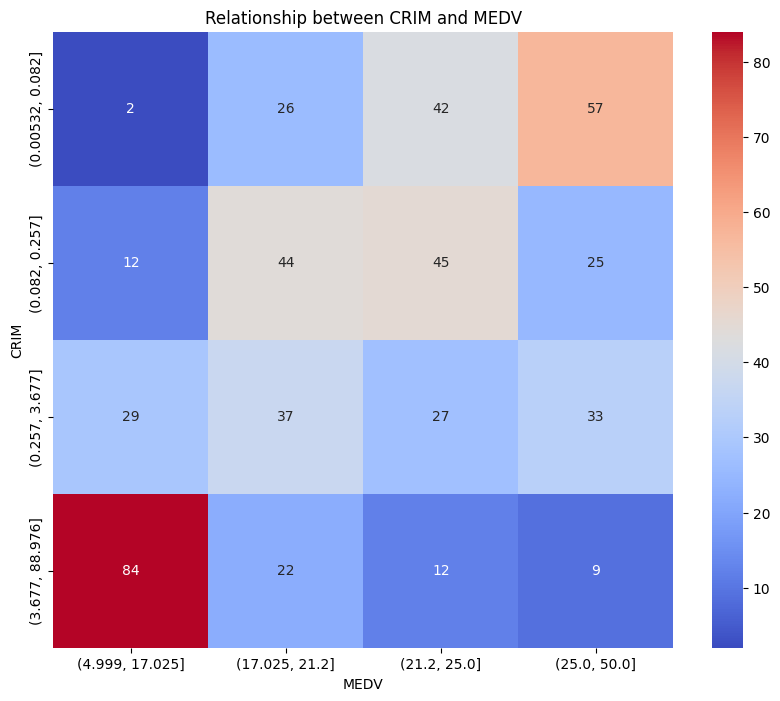

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crossTabDf, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between CRIM and MEDV')
plt.xlabel('MEDV')
plt.ylabel('CRIM')
plt.show()

19.calculate the chi-square and the associated p-value betweeb CRIM and MEDV in boston_binned dataframe. 

In [93]:
from scipy.stats import chi2_contingency

# Calculate the chi-square test statistic and p-value
chi2, p, dof, expected = chi2_contingency(crossTabDf)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:") # , expected

expected # NOTE: I do not Understand this Question & had to refer to GPT for the Soltuion.

Chi-square test statistic: 195.96280715687166
P-value: 2.3238405860709773e-37
Degrees of freedom: 9
Expected frequencies:


array([[31.87549407, 32.37747036, 31.62450593, 31.12252964],
       [31.62450593, 32.12252964, 31.37549407, 30.87747036],
       [31.62450593, 32.12252964, 31.37549407, 30.87747036],
       [31.87549407, 32.37747036, 31.62450593, 31.12252964]])

20.Below are the intervals for the variable MEDV in boston_binned dataframe. 
    
    - define a dictionary palette of interval names as keys and colors of your choice as values. 
    
    - print the dictionary

In [94]:
boston_binned['medv'].value_counts()

medv
(17.025, 21.2]     129
(4.999, 17.025]    127
(21.2, 25.0]       126
(25.0, 50.0]       124
Name: count, dtype: int64

In [95]:
palette = {
    str(key) # Convertion to String cause if we dont use Label when using qcut, it will become a 'pandas._libs.interval.Interval'
    :value 
        for key, value in 
            zip(
                sorted(boston_binned['medv'].unique(), key=lambda x: x.left),
                ['red', 'blue', 'green', 'purple'] # Since we did qcut with 4 Quantiles, im taking 4 colors.
            )
}
palette # Printing the Dictionary

{'(4.999, 17.025]': 'red',
 '(17.025, 21.2]': 'blue',
 '(21.2, 25.0]': 'green',
 '(25.0, 50.0]': 'purple'}

21.Plotting scatterplots: 
    
    - display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors. 
    
    - interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition. 

In [96]:
def is_in_interval(interval, number):
    # Remove parentheses or brackets and split into lower and upper bounds
    lower_inclusive = interval.startswith('[')
    upper_inclusive = interval.endswith(']')
    lower, upper = map(float, interval.strip('()[]').split(','))
    
    # Check if the number is within the interval
    return ((lower <= number if lower_inclusive else lower < number) and
            (number <= upper if upper_inclusive else number < upper))

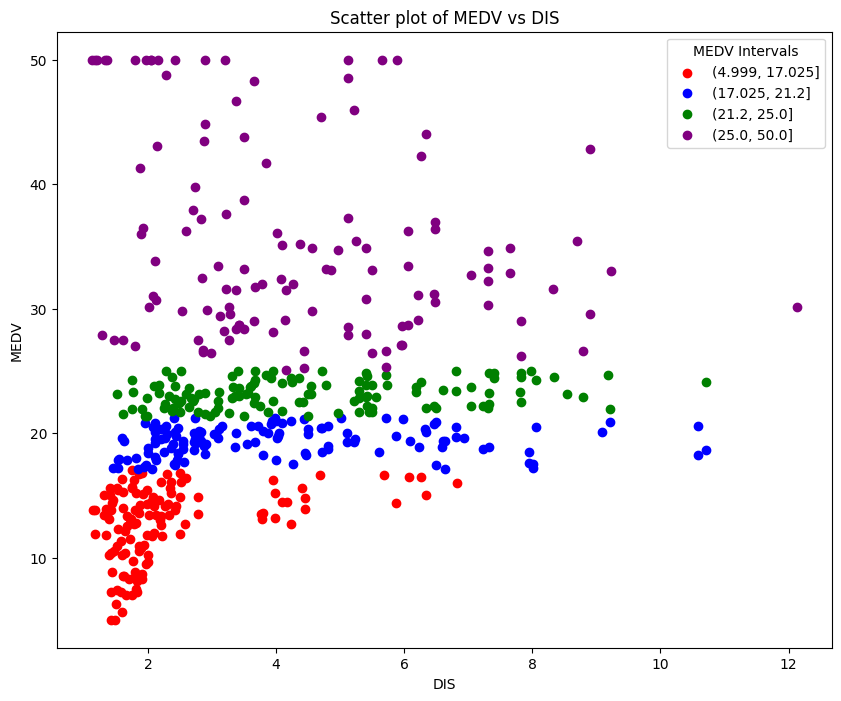

In [ ]:
plt.figure(figsize=(10, 8)) # Plotting scatter chart

for interval in sorted(boston_binned['medv'].unique()):
    subset = boston[boston['medv'].apply(lambda x: is_in_interval(str(interval), x))] # boston[boston['medv'].apply(lambda x: x in interval)]
    KEY = palette[str(interval)] # list(palette.keys())[interval]
    plt.scatter(subset['dis'], subset['medv'], label=str(interval), color=KEY)
    plt.legend(title='MEDV Intervals')

plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Scatter plot of MEDV vs DIS')
plt.show()

In [98]:
# Interpreting the Scatter Plot:
# The Scatter Plot shows the relationship between the 'DIS' and 'MEDV' columns.
# When Looking at the Diagram we can see that there is a Weak Positive Correlation between the 'DIS' and 'MEDV' columns.
# This can be Verified by the fact that as the 'DIS' increases, the 'MEDV' also increases, but the increase is not very significant.
# Below Is the Code for Correlation Matrix to Verify the Correlation between the Columns.
corrMatrix = boston[['dis', 'medv']].corr()
corrMatrix # Now when we look at the Output it's `0.249929` which is a Weak Positive Correlation.

,dis,medv
dis,1.000000,0.249929
medv,0.249929,1.000000


22.plotting scatterplots: 

    1. display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors. 

    3. interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition. 

In [99]:
# NOTE: The Q22 is same as Q21, so please refer to the Above Plot for the Scatter Chart & it's Interpretation.

23.display a scatter matrix with only the following variables: 
CRIM, ZN, INDUS, RM and MEDV.

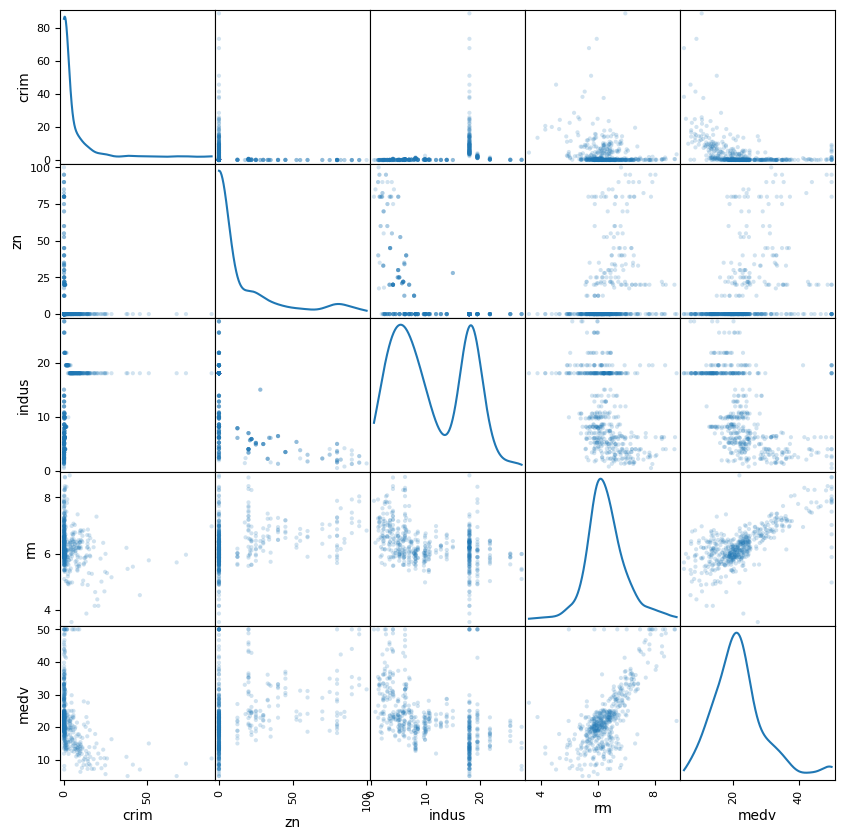

In [100]:
from pandas.plotting import scatter_matrix
columns_to_plot = ['crim', 'zn', 'indus', 'rm', 'medv']
scatter_matrix(boston[columns_to_plot], figsize=(10, 10), diagonal='kde', alpha=0.2)
plt.show()